# 計量経済学 統計的な処理の基礎

一橋大学大学院経済学研究科 原泰史

ここでは計量経済学で値を処理する上での基本的な内容をPython を通じて学習することを目指します。Google Colaboratory 上で実行出来るようになっていますので、適宜コードを実行して頂ければと思います。

統計学の講義で行ったことを、思い出して頂けると幸いです。

具体的には


* 平均
* 分散
* 相関係数

などの導出方法を復習かつPython での実行方法を履修していただきます。


## サンプルデータセットの読み込み

In [1]:
#ボストンのデータセットを読み込む
from sklearn.datasets import load_boston
boston = load_boston() 

In [2]:
#データの中身を確認する
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
#Pandas をインポートする
import pandas as pd

#X の値を取り出す
X = pd.DataFrame(boston.data, columns=boston.feature_names)
#Y の値を取り出す
#名前を指定する
y_name={"price"}
Y = pd.DataFrame(boston.target, columns=y_name)

In [4]:
#Xの中身を確認する
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
#Yの中身を確認する
Y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## 算術平均


ここでは、

$$ \bar{X}=\frac{\sum_{i=1}^{n} x_i}{n}=\frac{X_1+X_2+...+X_n}{n} $$

を求めている。
具体的には、

　$$ (65.2+78.9+61.1+45.8+54.2 + ... + 80.8)/506=68.57490 $$

などを計算することになる。

In [6]:
#Age のみ取り出す
age=X.AGE
#506個のデータが入っていることが確認できる
age

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [7]:
#必要なパッケージを導入する
import statistics
import math
import numpy as np

#平均を求める
print(statistics.mean(age))
#Numpy パッケージでも同様に導出できる
print(np.mean(age))

68.57490118577076
68.57490118577076


そのため、以下の計算でも求めることが出来る。(計算に合計5分間くらいかかります)


In [8]:
import time
k=0

#Age について、値をひとつひとつ取り出して足し合わせる
for n,i in enumerate(age):
    k=k+i
    print(n, i, k)
    time.sleep(0.01)

#それを値の個数で割る
print(k/len(age))

0 65.2 65.2
1 78.9 144.10000000000002
2 61.1 205.20000000000002
3 45.8 251.0
4 54.2 305.2
5 58.7 363.9
6 66.6 430.5
7 96.1 526.6
8 100.0 626.6
9 85.9 712.5
10 94.3 806.8
11 82.9 889.6999999999999
12 39.0 928.6999999999999
13 61.8 990.4999999999999
14 84.5 1075.0
15 56.5 1131.5
16 29.3 1160.8
17 81.7 1242.5
18 36.6 1279.1
19 69.5 1348.6
20 98.1 1446.6999999999998
21 89.2 1535.8999999999999
22 91.7 1627.6
23 100.0 1727.6
24 94.1 1821.6999999999998
25 85.7 1907.3999999999999
26 90.3 1997.6999999999998
27 88.8 2086.5
28 94.4 2180.9
29 87.3 2268.2000000000003
30 94.1 2362.3
31 100.0 2462.3
32 82.0 2544.3
33 95.0 2639.3
34 96.9 2736.2000000000003
35 68.2 2804.4
36 61.4 2865.8
37 41.5 2907.3
38 30.2 2937.5
39 21.8 2959.3
40 15.8 2975.1000000000004
41 2.9 2978.0000000000005
42 6.6 2984.6000000000004
43 6.5 2991.1000000000004
44 40.0 3031.1000000000004
45 33.8 3064.9000000000005
46 33.3 3098.2000000000007
47 85.5 3183.7000000000007
48 95.3 3279.000000000001
49 62.0 3341.000000000001
50 45.7 338

## 中央値

メディアンは、データを大きさの順に並べたときに、ちょうど中央にある値のこと。

「中央値」なので、値を昇順または降順に並べてちょうど真ん中になる値を示している。平均値とは往々にして異なる。


In [9]:
#メディアン(中央値)を求める
print(statistics.median(age))

77.5


In [10]:
#中央値の導出を、ソート関数を用いて行う

#値を並べ直す
age_sort=sorted(age)

#数列の真ん中を求める
num=round((len(age)-1)/2)
print(num, age_sort[num])

252 77.3


## 最頻値

「最頻値」は、値の中で最も頻繁に出てくる値を示す。

In [11]:
#最頻値を求める
print(statistics.mode(age))

100.0


## 分散

データの散らばりの程度を知るための方法が分散と、偏差。
n個のデータからなる母集団の平均をμとしたとき、分散 $$ σ^2 $$
は以下の数式で表される。
$$　\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2 $$

そのため、以下の構文からも求める事ができる。

In [12]:
#分散を求める
print(statistics.pvariance(age))

790.7924728163227


In [13]:
k=0
for j in age:
  k=k+np.power((j-np.mean(age)),2)
  #For文の使い方はDay1　な資料を参照のこと
  #np.power 構文をつかって、２乗を行っている

val=k*1/len(age)
print(val)

790.7924728163233


## 標準偏差

母集団からn個のデータを抽出した標本の平均を $$ \bar{x} $$
としたとき、不偏分散 $$ u^2 $$は以下のように表される。

$$　u^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$

In [14]:
#母集団の標準偏差
print(statistics.pstdev(age))
#母集団の標準偏差
#標準偏差は分散の平方根で与えられる
print(math.sqrt(statistics.pvariance(age)))
#同様に、For文を用いた計算からも求める事ができる
print(math.sqrt(val))

28.121032570236867
28.121032570236867
28.121032570236878


In [15]:
#標本分散を求める
print(statistics.variance(age))

792.358398505068


In [16]:
#標本標準偏差
print(statistics.stdev(age))
#標準偏差
#標準偏差は分散の平方根でも与えられる
print(math.sqrt(statistics.variance(age)))

28.148861406903617
28.148861406903617


## 加重平均と幾何平均

加重平均は、各データの重要度に応じてウェイト(w)をかけて平均する方法となる。

$$ \bar{X_w} = \frac{w_1X_1+w_2X_2+...+w_nX_n}{w_1+w_2+...+w_n} = \frac{\sum wX}{\sum w} $$

In [17]:
import numpy as np
#算術平均
ave = np.average(age)
#加重平均
#ここではNOXの値をweights の値として利用する
x_av = np.average(age, weights = X.NOX)
#重み付けをしている分、値が異なる
print(ave, x_av)

68.57490118577076 72.8677317986559


In [18]:
#同じ計算をFor文を使って行ってみる
k=0
s=0

#Day1　で取り上げたZIP 構文で計算する
for i, j in zip(age, X.NOX):
    k=k+i*j
    s=s+j

#分子を分母で割る
print(k/s)

72.86773179865587


幾何平均は、n個のデータの積のn乗根となる。

$$ G = \sqrt[n]{X_1 * X_2 * .... * X_n} $$

In [19]:
import numpy as np
from scipy.stats.mstats import gmean
#幾何平均を求める
print(gmean(age))

59.787875529235166


## 四分位範囲


データを小さな方から大きな方に順番に並べたときに、最初の1/4 の値を第一四分位点Q1, 1/2 の値(メディアン) を第二四分位点、最後の3/4の値を第3四分位点と呼ぶ。

In [20]:
# 75パーセント点、25パーセント点を取得
q75, q25 = np.percentile(age, [75 ,25])
iqr = q75 - q25
iqr2 = (q75 - q25) /2 
print("25パーセント点", q25)
print("75パーセント点", q75)
print("四分位範囲", iqr)
print("四分位偏差", iqr2)

25パーセント点 45.025
75パーセント点 94.07499999999999
四分位範囲 49.04999999999999
四分位偏差 24.524999999999995


{'whiskers': [<matplotlib.lines.Line2D at 0x12031e4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x12031eb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x12031e070>],
 'medians': [<matplotlib.lines.Line2D at 0x12032e280>],
 'fliers': [<matplotlib.lines.Line2D at 0x12032e610>],
 'means': []}

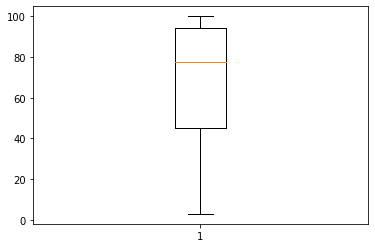

In [21]:
#箱ひげ図で値を可視化してみる
import matplotlib.pyplot as plt
plt.boxplot(age)

(array([ 14.,  31.,  29.,  42.,  32.,  38.,  39.,  42.,  71., 168.]),
 array([  2.9 ,  12.61,  22.32,  32.03,  41.74,  51.45,  61.16,  70.87,
         80.58,  90.29, 100.  ]),
 <BarContainer object of 10 artists>)

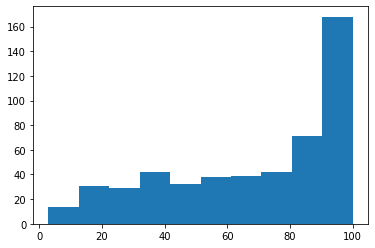

In [22]:
#ヒストグラムで値を可視化してみる
import matplotlib.pyplot as plt
plt.hist(age)

## Skewness and Kurtosis

Skewness (歪度) は、データの分布の歪み(非対称性)を示す指標。nをサンプルサイズ、sを標準偏差としたとき、以下の式で与えられる。

$$ Skewness = \frac{n}{(n-1)(n-2)} \times \frac{\sum(X - \bar{X})^3}{s^3} $$

値の分布が左側に歪んでいる場合にはSkewness <0 に、左右対称の場合にはSkewness =0に、右側に歪んでいる場合には Skewness > 0 になる。

尖度(Kurtosis) とは、分布の尖りの程度(算術平均への集中度)を示す指標となる。nをサンプルサイズ、sを標準偏差としたとき、以下の式で与えられる。

$$ Kurtosis = \frac{n(n+1)}{(n-1)(n-2)(n-3)} \times \frac{\sum(X - \bar{X})^4}{s^4} - \frac{3(n-1)^2}{(n-2)(n-3)} $$

尖度が<0のときは、正規分布よりなだらかな分布になる。尖度=0のときは、正規分布と同程度の尖り方になる。また、尖度が>0のときは正規分布より尖った分布となる。

In [23]:
# ライブラリを用いて Skewness and Kurtosis を計算する
print("Skewness :", age.skew())
print("Kurtosis :", age.kurt())

Skewness : -0.5989626398812962
Kurtosis : -0.9677155941626912


In [24]:
#skewnessを手作業で導出する

s=statistics.pstdev(age)
temp_ave=np.average(age)

#平均と標準偏差を求めておく
print(s, temp_ave)

t = 0

for k in age:
 t = t + np.power(k - temp_ave, 3)

skewness = len(age) / ((len(age) - 1) * (len(age) - 2)) * (t / np.power(s, 3))

#Skewness を定式に基づき導出してみた結果
print("Skewness:", skewness)

28.121032570236867 68.57490118577076
Skewness: -0.6007426172820454


In [25]:
#Kurtosisを手作業で導出する

s=statistics.pstdev(age)
temp_ave=np.average(age)

#平均と標準偏差を求めておく
print(s, temp_ave)

t = 0

for k in age:
 t = t + np.power(k - temp_ave, 4)

temp4 = (3 * np.power(len(age) - 1, 2)) / ((len(age) - 2) * (len(age) - 3))

kurtosis = (len(age) * (len(age) + 1)) / ((len(age) - 1) * (len(age) - 2) * (len(age) - 3)) * (t / np.power(s, 4)) - temp4

#Skewness を定式に基づき導出してみた結果
print("Kurtosis", kurtosis)

28.121032570236867 68.57490118577076
Kurtosis -0.9595879950588664


## 値の正規化と標準化

In [26]:
from sklearn import preprocessing
#Age の値について、最小値0, 最大値1 に正規化する
age2=preprocessing.minmax_scale(age)
print(age2)
print("平均値", np.average(age2))
print("最大値", np.max(age2))
print("最小値", np.min(age2))

[0.64160659 0.78269825 0.59938208 0.44181256 0.52832132 0.57466529
 0.65602472 0.95983522 1.         0.85478888 0.94129763 0.82389289
 0.37178167 0.60659114 0.84037075 0.55200824 0.27188465 0.8115345
 0.34706488 0.68589083 0.98043254 0.88877446 0.91452111 1.
 0.9392379  0.85272915 0.90010299 0.88465499 0.9423275  0.869207
 0.9392379  1.         0.8146241  0.94850669 0.96807415 0.67250257
 0.60247168 0.39752832 0.28115345 0.1946447  0.13285273 0.
 0.03810505 0.03707518 0.38208033 0.31822863 0.3130793  0.85066941
 0.95159629 0.60865088 0.4407827  0.61894954 0.18743563 0.19052523
 0.46035015 0.19567456 0.33779609 0.38722966 0.27085479 0.45623069
 0.65190525 0.93202884 0.66838311 0.41709578 0.58290422 0.15345005
 0.29042225 0.19052523 0.34912461 0.3099897  0.03810505 0.15036045
 0.05046344 0.03398558 0.03192585 0.43357364 0.73738414 0.44181256
 0.52317199 0.34706488 0.31513903 0.69515963 0.30175077 0.45108136
 0.46446962 0.54788877 0.4346035  0.55509784 0.85890834 0.6199794
 0.65087539 0.7

{'whiskers': [<matplotlib.lines.Line2D at 0x120491cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1204a0430>,
 'boxes': [<matplotlib.lines.Line2D at 0x120491940>],
 'medians': [<matplotlib.lines.Line2D at 0x1204a0b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1204a0f10>],
 'means': []}

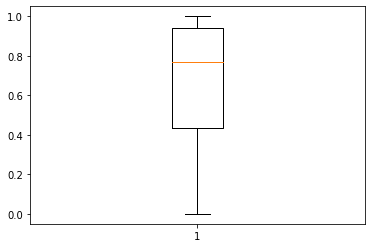

In [27]:
#箱ひげ図で値を可視化してみる
import matplotlib.pyplot as plt
plt.boxplot(age2)

(array([ 14.,  31.,  29.,  42.,  32.,  38.,  39.,  42.,  71., 168.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

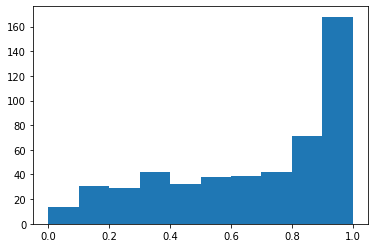

In [28]:
#ヒストグラムで値を可視化してみる
import matplotlib.pyplot as plt
plt.hist(age2)

In [29]:
from sklearn import preprocessing
ss = preprocessing.StandardScaler()
#Age の値について、平均0, 標準偏差1 に正規化する
age3=preprocessing.scale(age)
print(age3)
print("平均値", np.average(age3))
print("標準偏差", np.std(age3))
print("最大値", np.max(age3))
print("最小値", np.min(age3))

[-0.12001342  0.36716642 -0.26581176 -0.80988851 -0.51117971 -0.35115713
 -0.07022862  0.97880825  1.11749449  0.61609042  0.91479923  0.50940871
 -1.0517004  -0.24091936  0.56630562 -0.42939039 -1.39663795  0.46673602
 -1.13704577  0.03289704  1.0499294   0.73344031  0.82234174  1.11749449
  0.90768711  0.60897831  0.77255694  0.71921608  0.91835528  0.66587522
  0.90768711  1.11749449  0.47740419  0.93969163  1.00725671 -0.0133317
 -0.25514359 -0.96279897 -1.36463343 -1.66334224 -1.87670567 -2.33543704
 -2.20386293 -2.20741899 -1.01613983 -1.23661537 -1.25439566  0.60186619
  0.9503598  -0.23380725 -0.81344457 -0.19824667 -1.68823464 -1.67756646
 -0.74587948 -1.65978618 -1.16905029 -0.99835954 -1.400194   -0.76010371
 -0.08445284  0.88279471 -0.02755593 -0.89523388 -0.32270868 -1.80558452
 -1.33262892 -1.67756646 -1.12993366 -1.26506383 -2.20386293 -1.81625269
 -2.16119024 -2.21808716 -2.22519927 -0.83833697  0.2106999  -0.80988851
 -0.52895999 -1.13704577 -1.24728354  0.06490156 -1.

{'whiskers': [<matplotlib.lines.Line2D at 0x12057a7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x12057af10>,
 'boxes': [<matplotlib.lines.Line2D at 0x12057a460>],
 'medians': [<matplotlib.lines.Line2D at 0x120587670>],
 'fliers': [<matplotlib.lines.Line2D at 0x120587a00>],
 'means': []}

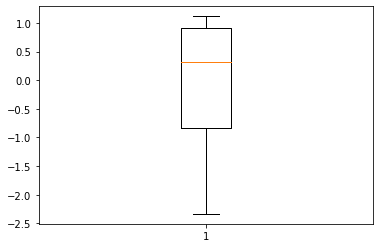

In [30]:
#箱ひげ図で値を可視化してみる
import matplotlib.pyplot as plt
plt.boxplot(age3)

(array([ 14.,  31.,  29.,  42.,  32.,  38.,  39.,  42.,  71., 168.]),
 array([-2.33543704, -1.99014389, -1.64485074, -1.29955759, -0.95426443,
        -0.60897128, -0.26367813,  0.08161503,  0.42690818,  0.77220133,
         1.11749449]),
 <BarContainer object of 10 artists>)

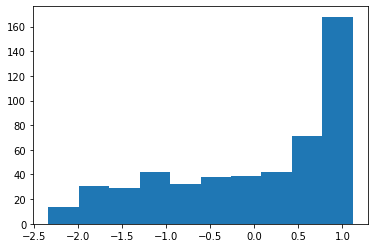

In [31]:
#ヒストグラムで値を可視化してみる
import matplotlib.pyplot as plt
plt.hist(age3)

## 相関係数

相関係数は、2つ、もしくはN個の変数間で、どの程度似たような傾向を持っているか確認するために用いられる。相関係数を求めると、変数の間にどの程度線形的な関係があるかを知ることができる。

$$ R = \frac{\sum{(X-\bar{X})(Y-\bar{Y})}}{\sqrt{\sum{(X-\bar{X})^2(Y-\bar{Y})^2}}}$$

R の値は-1 から1までの範囲となる。R=1のときは、正の完全相関となる。R>0のときは、変数間で正の相関を持つ。R=0 は無相関となる。R<0は負の相関となる。

In [32]:
#target とAge をconcat を用いてくっつける
Y_X_AGE = pd.concat([Y, X.AGE], axis=1)
#値を出力する
Y_X_AGE

,price,AGE
0,24.0,65.2
1,21.6,78.9
2,34.7,61.1
3,33.4,45.8
4,36.2,54.2
...,...,...
501,22.4,69.1
502,20.6,76.7
503,23.9,91.0
504,22.0,89.3


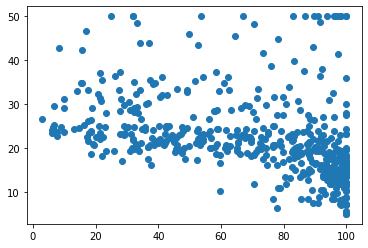

In [33]:
#散布図を導出する
plt.scatter(X.AGE, Y)

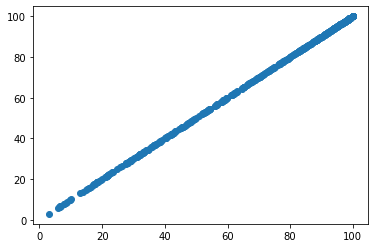

In [34]:
#ためしに、同じ変数で散布図を導出する
plt.scatter(X.AGE, X.AGE)

In [35]:
#基本統計量を導出する
Y_X_AGE.describe()

,price,AGE
count,506.000000,506.000000
mean,22.532806,68.574901
std,9.197104,28.148861
min,5.000000,2.900000
25%,17.025000,45.025000
50%,21.200000,77.500000
75%,25.000000,94.075000
max,50.000000,100.000000


In [36]:
Y_X_AGE.describe(percentiles=[0.2, 0.4, 0.6, 0.8])

,price,AGE
count,506.000000,506.000000
mean,22.532806,68.574901
std,9.197104,28.148861
min,5.000000,2.900000
20%,15.300000,37.800000
40%,19.700000,65.400000
50%,21.200000,77.500000
60%,22.700000,85.900000
80%,28.200000,95.600000
max,50.000000,100.000000


In [37]:
#２変数間の相関係数を導出する
res=Y_X_AGE.corr()
print(res)

          price       AGE
price  1.000000 -0.376955
AGE   -0.376955  1.000000


<AxesSubplot:>

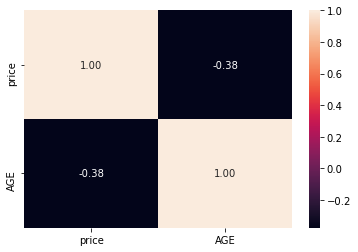

In [38]:
#seaborn パッケージを用いて可視化する
import seaborn as sns
sns.heatmap(Y_X_AGE.corr(), annot=True,fmt='.2f')

In [39]:
#相関係数の統計検定を行う
import scipy.stats as stats

pvalue, corrcoef = stats.pearsonr(X.AGE,X.NOX)
print( "Correlation coefficient = {:.1f}".format(corrcoef))
print( "p-value = {}".format(pvalue))

Correlation coefficient = 0.0
p-value = 0.7314701037859594


In [40]:
#基本統計量を導出する
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [41]:
#Xな変数間の相関係数を導出する
res2=X.corr()
print(res2)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

<AxesSubplot:>

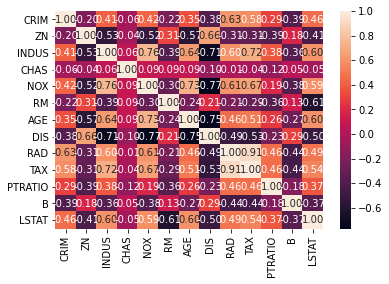

In [42]:
#seaborn パッケージを用いて可視化する
import seaborn as sns
sns.heatmap(X.corr(), annot=True,fmt='.2f')

# レポート1 (評点40点)

変数NOXおよびRMについて


* 平均
* 分散
* 標準偏差
* 中心値
* ヒストグラム
* ひげ図
* 相関係数(値とグラフ)
などを求めなさい。

提出は、Google Colaboratory の共有リンクもしくは Jupyter Notebook の内容をTeams のDM にて8/25日17:00 までに送付すること。


In [43]:
#レポート1を講師が解いてみるバージョン。
#変数Yを取り出す
Y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [44]:
#Xから変数DISを取り出す

var_dis=X.DIS
var_dis

0      4.0900
1      4.9671
2      4.9671
3      6.0622
4      6.0622
        ...  
501    2.4786
502    2.2875
503    2.1675
504    2.3889
505    2.5050
Name: DIS, Length: 506, dtype: float64

In [45]:
#レポート1の1.
#平均値を求める

#DataFrame形式をSeries形式に変換する
var_y2=Y["price"]

#必要なパッケージを導入する
import statistics
import math
import numpy as np

#平均を求める
print("DIS", statistics.mean(var_dis))
#Numpy パッケージでも同様に導出できる
print("DIS", np.mean(var_dis))

#平均を求める
print("Price の平均値", statistics.mean(var_y2))
#Numpy パッケージでも同様に導出できる
print("Price の平均値", np.mean(var_y2))

DIS 3.7950426877470353
DIS 3.795042687747034
Price の平均値 22.532806324110673
Price の平均値 22.532806324110698


In [46]:
#レポート１−２．
#分散を求める

#分散を求める
print("Price の分散", statistics.pvariance(var_y2))
#分散を求める
print("DIS の分散", statistics.pvariance(var_dis))

Price の分散 84.41955615616554
DIS の分散 4.4252522616164915


In [47]:
#レポート１−３．
#標準偏差を求める

#標本標準偏差
print("Price の標準偏差", statistics.stdev(var_y2))
#標本標準偏差
print("DIS の標準偏差", statistics.stdev(var_dis))

Price の標準偏差 9.197104087379817
DIS の標準偏差 2.105710126627611


In [48]:
#レポート1-4.
#中央値

#メディアン(中央値)を求める
print("Price の中央値", statistics.median(var_y2))
#メディアン(中央値)を求める
print("DIS の中央値", statistics.median(var_dis))

Price の中央値 21.2
DIS の中央値 3.2074499999999997


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

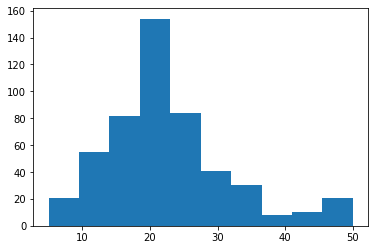

In [49]:
#レポート1.5
#ヒストグラム

#ヒストグラムで値を可視化してみる
import matplotlib.pyplot as plt
plt.hist(var_y2)

(array([150., 111.,  81.,  61.,  46.,  26.,  19.,   7.,   4.,   1.]),
 array([ 1.1296 ,  2.22929,  3.32898,  4.42867,  5.52836,  6.62805,
         7.72774,  8.82743,  9.92712, 11.02681, 12.1265 ]),
 <BarContainer object of 10 artists>)

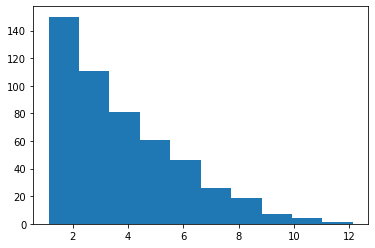

In [50]:
plt.hist(var_dis)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe4e1d11c70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe4e1d20370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe4e1d11940>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe4e1d20a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe4e1d20d90>],
 'means': []}

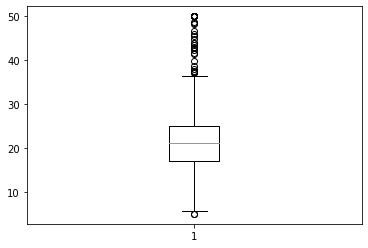

In [51]:
#レポート1.6
#箱ひげ図

#箱ひげ図で値を可視化してみる
import matplotlib.pyplot as plt
plt.boxplot(var_y2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe4e1d69c70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe4e1d763a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe4e1d698e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe4e1d76a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe4e1d76dc0>],
 'means': []}

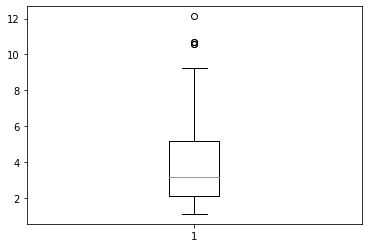

In [52]:

#箱ひげ図で値を可視化してみる
import matplotlib.pyplot as plt
plt.boxplot(var_dis)

In [53]:
#target とAge をconcat を用いてくっつける
list_forreport = pd.concat([Y, X.DIS], axis=1)
#値を出力する
list_forreport

,price,DIS
0,24.0,4.0900
1,21.6,4.9671
2,34.7,4.9671
3,33.4,6.0622
4,36.2,6.0622
...,...,...
501,22.4,2.4786
502,20.6,2.2875
503,23.9,2.1675
504,22.0,2.3889


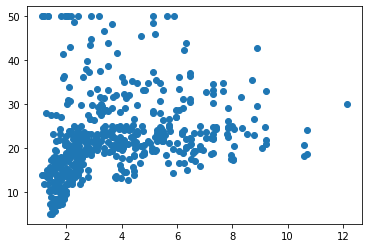

In [54]:
#散布図を導出する
plt.scatter(X.DIS, Y)

In [55]:
#２変数間の相関係数を導出する
res2=list_forreport.corr()
print(res2)

          price       DIS
price  1.000000  0.249929
DIS    0.249929  1.000000


<AxesSubplot:>

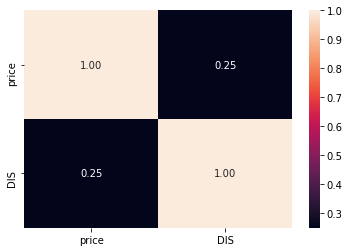

In [56]:
#seaborn パッケージを用いて可視化する
import seaborn as sns
sns.heatmap(list_forreport.corr(), annot=True,fmt='.2f')